In [166]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import pathlib
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from keras.models import model_from_json

from sklearn.metrics import confusion_matrix, classification_report

In [45]:
pre_trained_model = MobileNetV2(include_top=False, pooling='avg')

In [46]:
pre_trained_model.trainable = False

In [48]:
train_data_location = 'C:/Users/danie/Documents/FTDS/Capstone/3. Model/Data/Train'
train_data = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(train_data_location, target_size=(224,224))

Found 5528 images belonging to 12 classes.


In [49]:
validation_data_location = 'C:/Users/danie/Documents/FTDS/Capstone/3. Model/Data/Test'
validation_data = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(validation_data_location, target_size=(224,224))

Found 1303 images belonging to 12 classes.


In [50]:
class_mappings = train_data.class_indices
print(class_mappings)

{'Blouses': 0, 'Dresses': 1, 'Jackets & Coats': 2, 'Jeans': 3, 'Jumpers': 4, 'Polos': 5, 'Shirts': 6, 'Shorts': 7, 'Skirts': 8, 'Suits': 9, 'T-Shirts': 10, 'Trousers': 11}


In [52]:
model = Sequential()
model.add(pre_trained_model)
model.add(Dense(len(class_mappings), activation='softmax'))

In [53]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])#add more metrics if req

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 12)                15372     
Total params: 2,273,356
Trainable params: 15,372
Non-trainable params: 2,257,984
_________________________________________________________________


In [55]:
training_history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
173/173 [==============================] - 408s 2s/step - loss: 1.2883 - accuracy: 0.5798 - val_loss: 1.0104 - val_accuracy: 0.6577
Epoch 2/20
173/173 [==============================] - 371s 2s/step - loss: 0.9005 - accuracy: 0.7084 - val_loss: 0.8788 - val_accuracy: 0.7183
Epoch 3/20
173/173 [==============================] - 353s 2s/step - loss: 0.7851 - accuracy: 0.7466 - val_loss: 0.8580 - val_accuracy: 0.7068
Epoch 4/20
173/173 [==============================] - 396s 2s/step - loss: 0.7078 - accuracy: 0.7685 - val_loss: 0.8174 - val_accuracy: 0.7222
Epoch 5/20
173/173 [==============================] - 498s 3s/step - loss: 0.6482 - accuracy: 0.7869 - val_loss: 0.7885 - val_accuracy: 0.7375
Epoch 6/20
173/173 [==============================] - 602s 3s/step - loss: 0.6014 - accuracy: 0.7983 - val_loss: 0.7793 - val_accuracy: 0.7337
Epoch 7/20
173/173 [==============================] - 576s 3s/step - loss: 0.5616 - accuracy: 0.8128 - val_loss: 0.7665 - val_accuracy: 0.7337

In [56]:
# Save Model
fer_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("model.h5")

In [61]:
def plot_training_accuracy(training_history):
    plt.plot(training_history.history['accuracy'], label = 'training accuracy')
    plt.plot(training_history.history['val_accuracy'], label = 'validation accuracy')
    plt.legend
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

def plot_training_loss(training_history):
    plt.plot(training_history.history['loss'], label = 'training loss')
    plt.plot(training_history.history['val_loss'], label = 'validation loss')
    plt.legend
    plt.xlabel('epoch')
    plt.ylabel('loss')

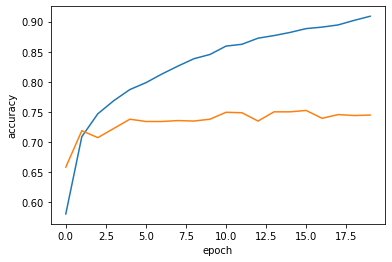

In [62]:
plot_training_accuracy(training_history)

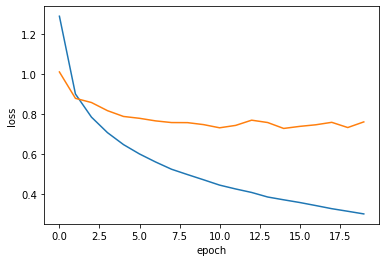

In [63]:
plot_training_loss(training_history)

In [64]:
# Load Model
test_model = model_from_json(open("model.json", "r").read()) 
test_model.load_weights('model.h5')

In [160]:
validation_data.classes[0:56]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [112]:
#Test Model
Y_pred = test_model.predict(validation_data) #, steps = validation_data.n//validation_data.batch_size+1
y_pred = np.argmax(Y_pred, axis=1)
y_pred[0:56]

array([10, 11,  5,  1,  4,  6,  1,  8,  8,  5, 10, 10, 11, 11,  8, 10,  4,
        1,  5,  1, 10,  1, 11, 10,  9, 11,  2,  9,  8,  5,  8,  4,  4,  2,
        0, 10, 10, 11,  4,  1,  4, 11,  4, 10,  8, 10, 10, 10, 10,  6,  4,
        7, 11,  0,  4,  7], dtype=int64)

In [96]:
confusion_matrix(validation_data.classes, y_pred)

array([[ 3,  5,  7,  4, 12,  5,  1,  1,  3,  2,  8,  5],
       [ 1,  6, 10,  3, 14,  8,  2,  2,  7,  6, 20, 16],
       [ 9, 13,  7,  4, 20,  6,  3,  8, 10,  5, 21, 27],
       [ 2,  4,  4,  3,  7,  5,  1,  3,  2,  2, 17,  9],
       [ 5, 16, 14,  3, 40, 16,  8, 18,  8,  6, 37, 33],
       [ 1,  3,  6,  3, 20,  6,  4,  3,  5,  3, 11, 12],
       [ 0,  4,  6,  1, 13,  4,  2,  4,  2,  0,  8, 11],
       [ 1,  3, 12,  3, 19,  7,  3,  3,  6,  1, 12, 13],
       [ 2,  5,  4,  1,  9,  1,  1,  2,  3,  2, 10,  8],
       [ 3,  0,  4,  2, 11,  4,  2,  7,  2,  0, 10, 11],
       [14, 22, 25, 12, 51, 11,  4, 14, 15,  7, 55, 32],
       [ 9, 18, 18,  5, 20, 10,  6, 11,  8, 12, 36, 22]], dtype=int64)

In [98]:
target_names = class_mappings.keys()
print(classification_report(validation_data.classes, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

        Blouses       0.06      0.05      0.06        56
        Dresses       0.06      0.06      0.06        95
Jackets & Coats       0.06      0.05      0.06       133
          Jeans       0.07      0.05      0.06        59
        Jumpers       0.17      0.20      0.18       204
          Polos       0.07      0.08      0.08        77
         Shirts       0.05      0.04      0.04        55
         Shorts       0.04      0.04      0.04        83
         Skirts       0.04      0.06      0.05        48
          Suits       0.00      0.00      0.00        56
       T-Shirts       0.22      0.21      0.22       262
       Trousers       0.11      0.13      0.12       175

       accuracy                           0.12      1303
      macro avg       0.08      0.08      0.08      1303
   weighted avg       0.11      0.12      0.11      1303



## Test Predictions

In [89]:
validation_data_location = 'C:/Users/danie/Documents/FTDS/Capstone/3. Model/Data/Test'
for folder in os.listdir(validation_data_location)[0:1]: # loop through each category within a shop/brand
    print(folder)
    for file_name in os.listdir(validation_data_location + '/' + folder):
        location = validation_data_location + '/' + folder + '/' + file_name
        img = image.load_img(location, target_size=(224, 224))
        test_img = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(location, target_size=(224,224))
        plt.title(model.predict(test_img))
        plt.imshow(img)
        plt.show()

Blouses


NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/Users/danie/Documents/FTDS/Capstone/3. Model/Data/Test/Blouses/0Tailored-Fit Watermelon-Printed Shirt.jpg'

In [92]:
validation_data_location = 'C:/Users/danie/Documents/FTDS/Capstone/3. Model/Data/Test'
for folder in os.listdir(validation_data_location)[0:1]: # loop through each category within a shop/brand
    print(folder)
    location = validation_data_location + '/' + folder
    test_img = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(location, target_size=(224,224))
    pred = model.predict(test_img)


Blouses
Found 0 images belonging to 0 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
#from imagenet class predictor
print("Top predictions for this image:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(f"Prediction: {name} - {likelihood:2f}")

In [114]:
#use model to predict test set data
STEP_SIZE_TEST=validation_data.n//validation_data.batch_size
validation_data.reset()

# run model on test set and output predicted class using argmax
pred=model.predict(validation_data, steps=STEP_SIZE_TEST, verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

labels = (validation_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print("predictions for test images" , predictions)

for i in range(len(predictions)):
    plt.title(f'Prediction: {predictions[i]}')
    plt.imshow(np.squeeze(validation_data[i])/255)
    plt.show()

40/40 [==============================] - 62s 2s/step
predictions for test images ['Polos', 'Skirts', 'Skirts', 'Trousers', 'Jumpers', 'Dresses', 'Skirts', 'Shorts', 'Shirts', 'Dresses', 'Dresses', 'Jumpers', 'Skirts', 'Dresses', 'Shirts', 'Suits', 'Dresses', 'Jackets & Coats', 'Blouses', 'T-Shirts', 'Dresses', 'Trousers', 'Trousers', 'Trousers', 'Jumpers', 'Shirts', 'Jeans', 'Jackets & Coats', 'Trousers', 'T-Shirts', 'Trousers', 'Trousers', 'Dresses', 'Jackets & Coats', 'T-Shirts', 'Dresses', 'Trousers', 'T-Shirts', 'Jumpers', 'Jumpers', 'Shirts', 'Jackets & Coats', 'Suits', 'Jumpers', 'Jackets & Coats', 'Jeans', 'Jumpers', 'T-Shirts', 'Trousers', 'Dresses', 'Jumpers', 'Jumpers', 'Jumpers', 'Blouses', 'Jackets & Coats', 'Jumpers', 'Dresses', 'Jumpers', 'Blouses', 'Jumpers', 'Shorts', 'Jumpers', 'T-Shirts', 'Trousers', 'Trousers', 'Trousers', 'Polos', 'Trousers', 'Jeans', 'Trousers', 'Polos', 'Jumpers', 'Blouses', 'Blouses', 'Shorts', 'Jumpers', 'Dresses', 'Shorts', 'Jackets & Coats', '

ValueError: could not broadcast input array from shape (32,224,224,3) into shape (32)

array([10,  5, 11,  5, 11,  4,  8,  7, 11,  5,  8,  9,  4, 11,  4,  9,  4,
        4, 11,  1,  4,  4,  8, 10,  3, 10,  5,  8,  4,  1, 10, 11],
      dtype=int64)

In [157]:
class_lookup = dict((v, k) for k, v in class_mappings.items())
class_lookup

{0: 'Blouses',
 1: 'Dresses',
 2: 'Jackets & Coats',
 3: 'Jeans',
 4: 'Jumpers',
 5: 'Polos',
 6: 'Shirts',
 7: 'Shorts',
 8: 'Skirts',
 9: 'Suits',
 10: 'T-Shirts',
 11: 'Trousers'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


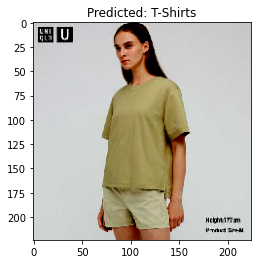

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


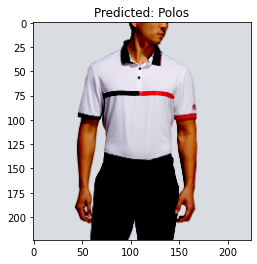

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


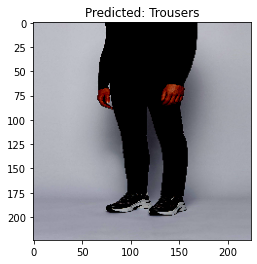

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


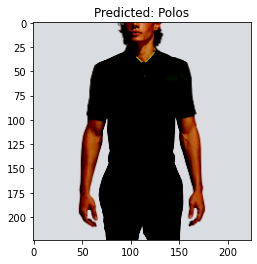

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


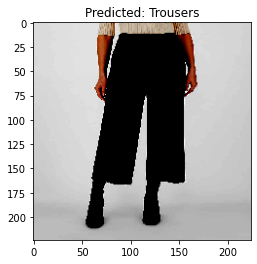

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


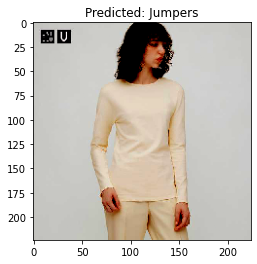

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


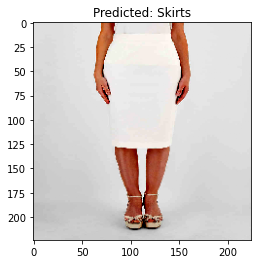

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


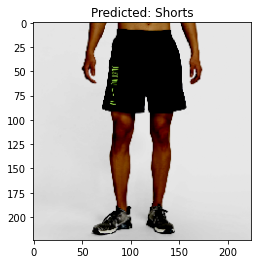

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


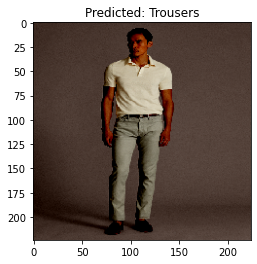

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


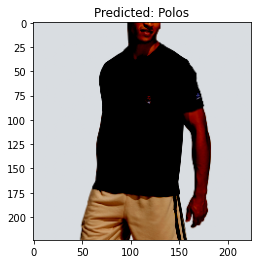

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


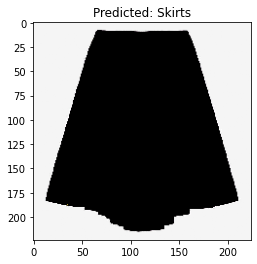

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


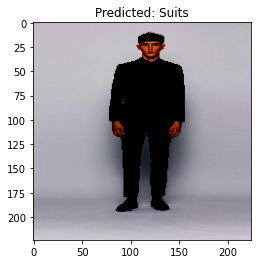

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


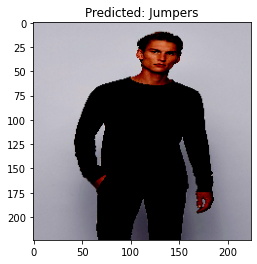

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


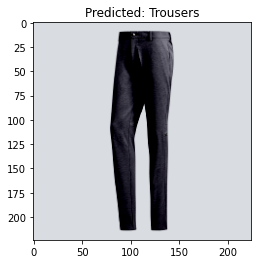

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


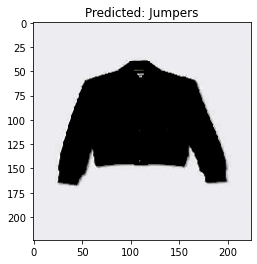

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


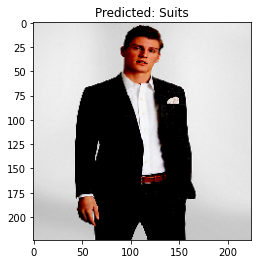

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


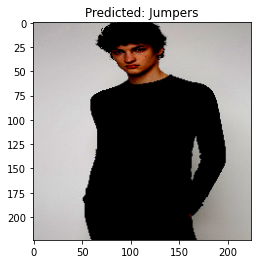

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


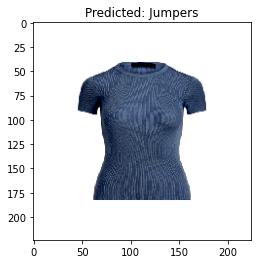

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


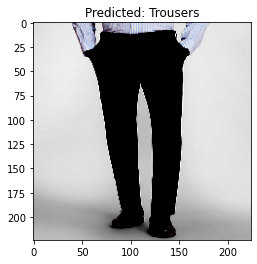

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


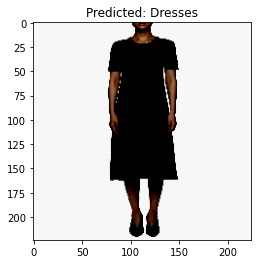

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


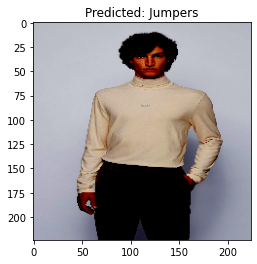

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


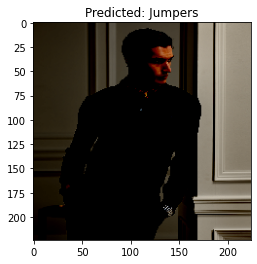

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


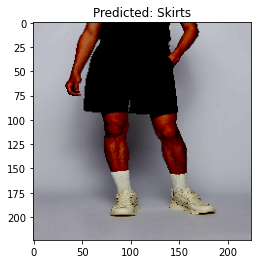

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


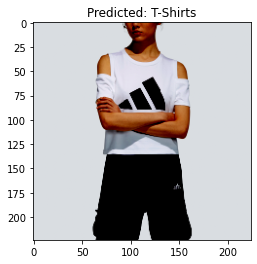

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


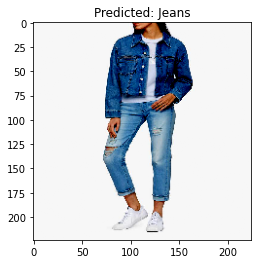

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


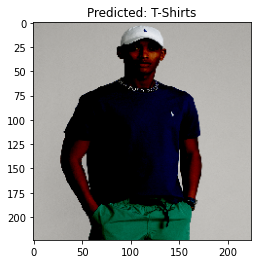

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


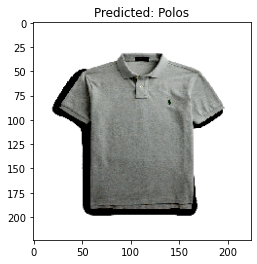

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


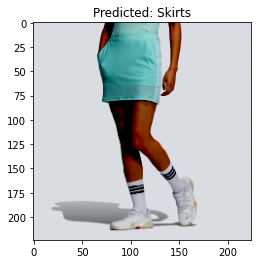

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


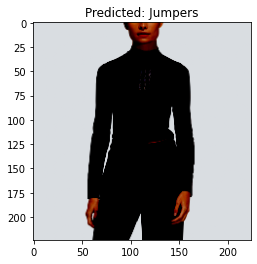

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


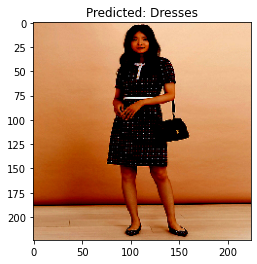

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


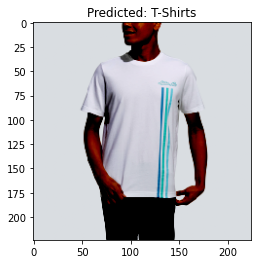

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


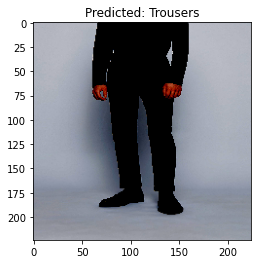

In [158]:
j = 1

predictions = model.predict(validation_data[j][0])
predictions = np.argmax(predictions, axis = 1)

for i in range(32):
    plt.imshow(validation_data[j][0][i])
    plt.title(f'Predicted: {class_lookup[predictions[i]]}')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


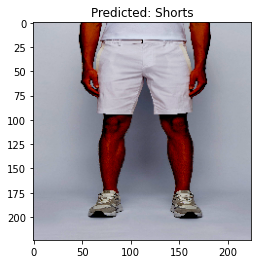

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


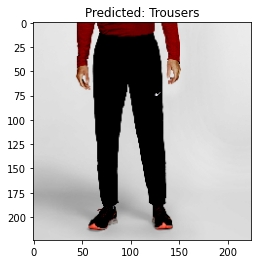

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


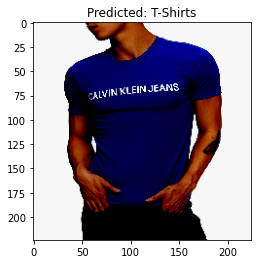

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


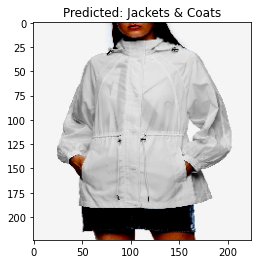

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


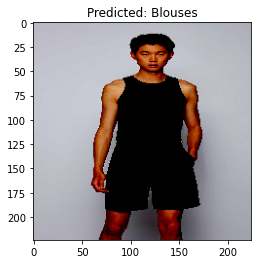

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


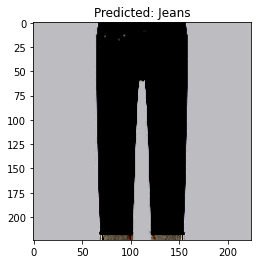

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


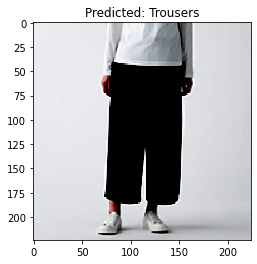

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


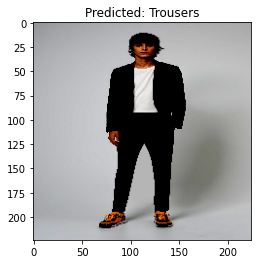

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


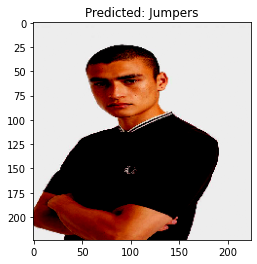

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


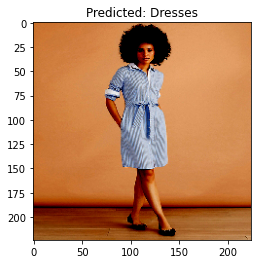

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


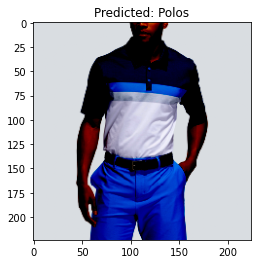

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


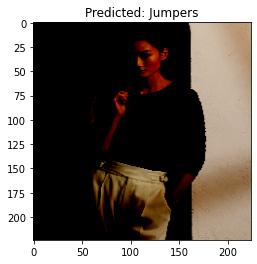

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


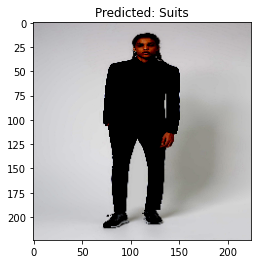

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


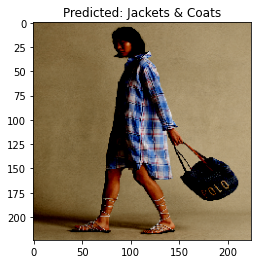

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


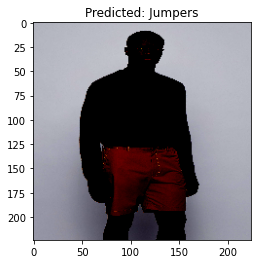

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


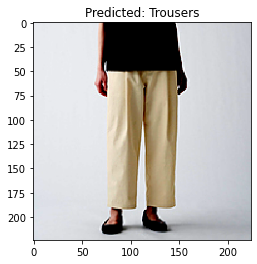

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


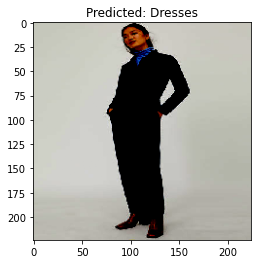

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


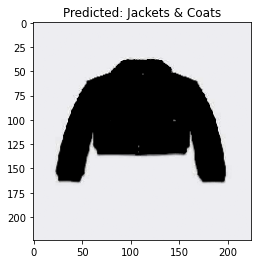

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


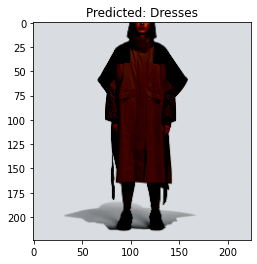

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


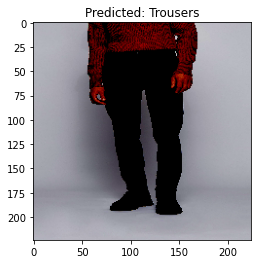

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


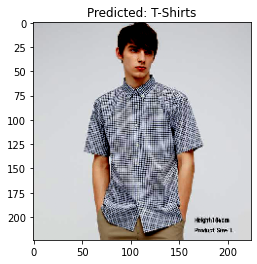

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


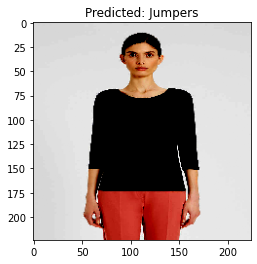

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


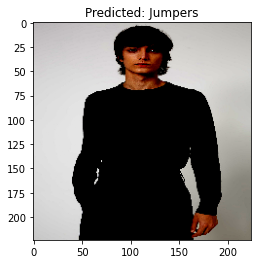

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


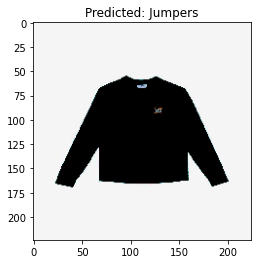

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


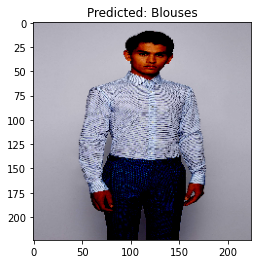

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


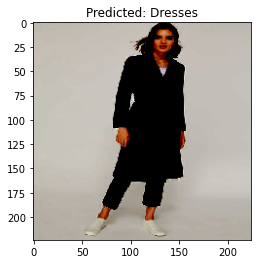

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


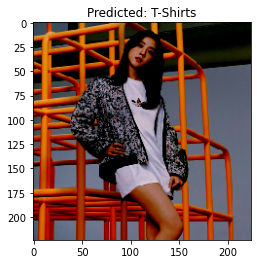

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


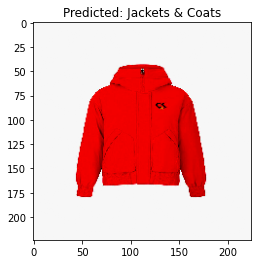

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


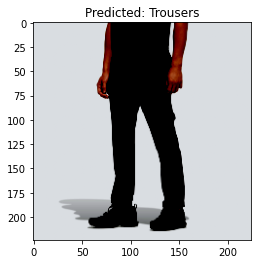

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


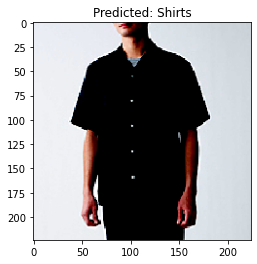

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


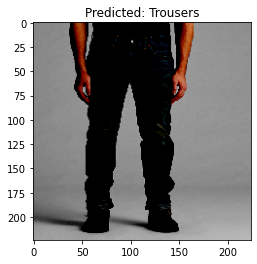

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


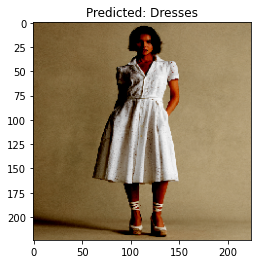

In [164]:
j = 2

predictions = model.predict(validation_data[j][0])
predictions = np.argmax(predictions, axis = 1)

for i in range(32):
    plt.imshow(validation_data[j][0][i])
    plt.title(f'Predicted: {class_lookup[predictions[i]]}')
    plt.show()

In [134]:
#validation_data[1].shape
print(validation_data[2][0].shape)
print(validation_data[2][0][0].shape)

(32, 224, 224, 3)
(224, 224, 3)
